# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

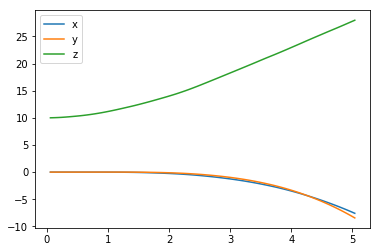

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

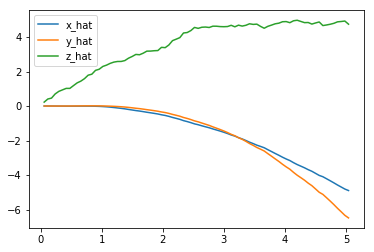

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

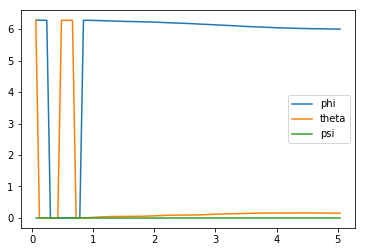

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

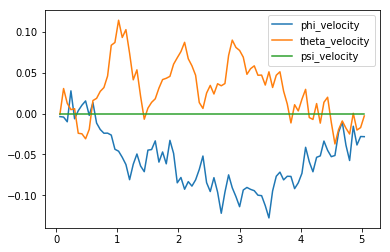

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

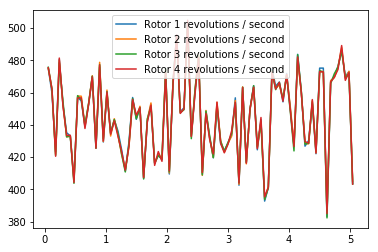

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -7.58915498  -8.44048247  27.98162114   6.00110407   0.15045336   0.        ]
[-4.90033757 -6.48793425  4.74478404]
[-0.0283039  -0.00298602  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   2.280 (best =   2.281), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.

import sys
import pandas as pd
from agents.agent import Agent
from task import Task 

num_episodes = 500
best_score = -100

target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = Agent(task) 

rewards = []
stats = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score, score)
             
        if done:
            print("\r{:4d}. score: {:8.3f} best: {:8.3f} pos: ({:8.2f},{:8.2f},{:8.2f})".format(i_episode, score, best_score, task.sim.pose[0],task.sim.pose[1], task.sim.pose[2]))

            break

    rewards.append(score)
    stats[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,'Position':(task.sim.pose[0],task.sim.pose[1],task.sim.pose[2])}
    sys.stdout.flush()

Using TensorFlow backend.


   1. score:  181.701 best:  181.701 pos: (   -2.42,   22.39,   24.11)
   2. score:  128.763 best:  181.701 pos: (  -11.27,   18.56,    0.00)
   3. score:   72.980 best:  181.701 pos: (    9.86,   18.81,    0.00)
   4. score:   55.945 best:  181.701 pos: (    2.10,   13.17,    0.00)
   5. score:  111.949 best:  181.701 pos: (   15.45,   -8.72,    0.00)
   6. score:  175.669 best:  181.701 pos: (  -27.61,  121.69,   28.00)
   7. score:   87.271 best:  181.701 pos: (  -41.38,   16.66,    0.00)
   8. score:   53.799 best:  181.701 pos: (   12.21,    2.11,    0.00)
   9. score:   53.826 best:  181.701 pos: (    9.83,    1.41,    0.00)
  10. score:   53.835 best:  181.701 pos: (    7.54,    2.27,    0.00)
  11. score:   83.875 best:  181.701 pos: (    5.06,   13.44,    0.00)
  12. score:   47.320 best:  181.701 pos: (  -10.66,    3.70,    0.00)
  13. score:   43.009 best:  181.701 pos: (   -8.66,   -3.83,    0.00)
  14. score:   40.937 best:  181.701 pos: (   -0.74,   -5.06,    0.00)
  15. 

 117. score:  164.020 best:  185.675 pos: (  150.00,  -33.20,  300.00)
 118. score:  180.871 best:  185.675 pos: (  150.00,  -62.56,  300.00)
 119. score:  176.841 best:  185.675 pos: (  146.75,   24.54,  300.00)
 120. score:  184.569 best:  185.675 pos: (   45.59,   36.22,  127.82)
 121. score:  167.446 best:  185.675 pos: (  150.00,   80.80,  300.00)
 122. score:  183.710 best:  185.675 pos: (   55.12,   62.77,  145.91)
 123. score:  186.139 best:  186.139 pos: (  -18.71,   20.71,  134.02)
 124. score:  184.055 best:  186.139 pos: (   53.30,   53.38,  148.20)
 125. score:  184.392 best:  186.139 pos: (   40.42,   39.83,  144.86)
 126. score:  175.028 best:  186.139 pos: (  105.29,  150.00,  189.49)
 127. score:  168.452 best:  186.139 pos: (  150.00,  -17.31,  292.57)
 128. score:  170.513 best:  186.139 pos: (    5.98,  138.68,  300.00)
 129. score:  184.415 best:  186.139 pos: (   36.49,   58.40,  148.89)
 130. score:  158.588 best:  186.139 pos: (  150.00,  150.00,  300.00)
 131. 

 233. score:  185.868 best:  186.993 pos: (  -35.20,  -20.30,  129.46)
 234. score:  184.761 best:  186.993 pos: (  -34.99,  -67.28,   99.08)
 235. score:  186.780 best:  186.993 pos: (    7.62,    5.78,  144.25)
 236. score:  185.545 best:  186.993 pos: (   19.81,   35.55,  179.82)
 237. score:  186.801 best:  186.993 pos: (    5.18,  -22.82,  140.44)
 238. score:  186.236 best:  186.993 pos: (    5.55,  -26.54,  135.32)
 239. score:  186.353 best:  186.993 pos: (  -30.20,   10.04,  139.92)
 240. score:  186.065 best:  186.993 pos: (   -7.61,  -45.70,  127.14)
 241. score:  186.465 best:  186.993 pos: (  -27.94,    2.30,  135.64)
 242. score:  185.512 best:  186.993 pos: (  -49.68,   17.42,  123.51)
 243. score:  186.054 best:  186.993 pos: (   37.98,   -3.62,  133.89)
 244. score:  186.371 best:  186.993 pos: (   16.54,   14.25,  138.30)
 245. score:  186.069 best:  186.993 pos: (    2.50,  -49.85,  123.89)
 246. score:  184.938 best:  186.993 pos: (   37.77,   35.19,  153.80)
 247. 

 349. score:  186.063 best:  187.048 pos: (    4.25,   36.46,  159.06)
 350. score:  185.862 best:  187.048 pos: (  -36.36,  -21.18,  129.06)
 351. score:  186.374 best:  187.048 pos: (  -20.62,   10.41,  135.84)
 352. score:  185.393 best:  187.048 pos: (  -27.68,   20.05,  169.08)
 353. score:  186.759 best:  187.048 pos: (   16.42,   -6.62,  138.03)
 354. score:  186.845 best:  187.048 pos: (  -15.76,   -2.20,  137.42)
 355. score:  185.998 best:  187.048 pos: (   24.43,   20.27,  154.59)
 356. score:  186.357 best:  187.048 pos: (   15.39,   14.21,  145.99)
 357. score:  177.288 best:  187.048 pos: (   48.14,   54.20,  300.00)
 358. score:  185.451 best:  187.048 pos: (   38.37,   23.67,  179.02)
 359. score:  185.211 best:  187.048 pos: (  -63.45,  -20.69,  112.97)
 360. score:  185.799 best:  187.048 pos: (  -46.15,  -14.66,  126.14)
 361. score:  186.433 best:  187.048 pos: (   23.91,   -3.58,  137.00)
 362. score:  186.835 best:  187.048 pos: (   11.29,   -4.22,  140.22)
 363. 

 465. score:  185.860 best:  187.094 pos: (    5.82,  -40.95,  130.14)
 466. score:  184.633 best:  187.094 pos: (  -57.68,   19.08,  139.13)
 467. score:  185.220 best:  187.094 pos: (   37.56,  -31.82,  132.50)
 468. score:  186.480 best:  187.094 pos: (    7.31,   18.30,  138.41)
 469. score:  186.843 best:  187.094 pos: (  -11.99,   -5.06,  138.86)
 470. score:  185.878 best:  187.094 pos: (  -38.25,   17.76,  129.58)
 471. score:  186.949 best:  187.094 pos: (  -11.04,   -3.56,  137.92)
 472. score:  186.030 best:  187.094 pos: (  -49.51,    0.84,  136.03)
 473. score:  186.295 best:  187.094 pos: (   10.21,   -8.24,  162.07)
 474. score:  186.566 best:  187.094 pos: (    0.63,   20.35,  141.06)
 475. score:  186.358 best:  187.094 pos: (  -39.89,    1.37,  129.10)
 476. score:  186.044 best:  187.094 pos: (   21.11,  -30.62,  132.97)
 477. score:  185.985 best:  187.094 pos: (   26.43,   14.04,  145.94)
 478. score:  186.329 best:  187.094 pos: (   11.48,  -19.91,  142.89)
 479. 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

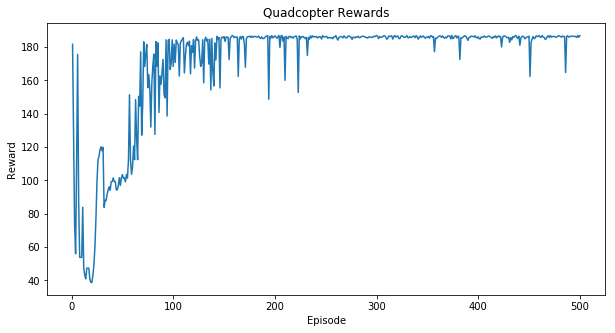

In [11]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
import re

stats = pd.DataFrame(stats).T
stats = stats[['Episode','Reward','Action','Position']]
stats['Action_Val'] = stats['Action'].apply(lambda x: x[0])

# Print Reward per Episode
plt.figure(figsize=(10,5))
plt.plot(stats['Reward'])
plt.title("Quadcopter Rewards")
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I initially chose to leave the task untouched, but was getting less-than-favorable results. I then modified the Reward Function and trained for takeoff.


Reward Function: reward = np.tanh(1 - 0.001*(abs(self.sim.pose[:3] - self.target_pos)).sum())

As such, the quadcopter is granted a reward of 1 for each episode minus a penalty of based on the distance between its current location and the desired, target location. I had to experiment with a variety of penalties to achieve rewards that made sense and any action in the vertical axis.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: The model utilized Deep Q-Learning methodology, utilizing similar architecture found in the Google Deepmind paper on DDPG (https://arxiv.org/pdf/1509.02971.pdf). A couple of the agents were modeled after the Keras implementations in the VizDoom project (https://github.com/flyyufelix/VizDoom-Keras-RL). 

Actor and Critic Neural Net Specs:
- 2 layers (400 and 300)
- 12 0.01 Regularizer
- Batch Normalization
- Relu Activation w/ Adam optimizer (for adaptative learning)
- 0.0001 Actor Learning Rate
- 0.001 Critic Learning Rate
- Initialized with Uniform Distribution [-3e-3, 3e-3]
- Gamme/Disc. Rate of 0.99 to generate preference for immediate gratification

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: There was very little happening in the Z-coordinates until Episode 40, where it looks like more of an aha moment. An OU-layer was included to try and even out some of the noise. The mean reward over the last 10 episodes was 187, and the agent was able to achieve that in roughly 300 episodes. As such, this does not seem to have been an overly difficult task to learn.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: I felt that getting started was one of the most difficult parts of the project. There are a number of different approaches that can be taken, and deciding on one and pursuing it was time consuming. The learning process was interesting, as it seemed to generate fairly large spikes in reward generation. I would like to try and even that out in the future.

This was an interesting project in that I was able to bring a number of learnings, both from Udacity and professional work, together. I would be interested in implementing this in a real drone and watching the process unfold. 